<a href="https://colab.research.google.com/github/nan-park/section2_project/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [19]:
from google.colab import files
files.upload();

Saving kor_economic_monthly_data.csv to kor_economic_monthly_data (2).csv
Saving kor_economic_monthly_data_clean.csv to kor_economic_monthly_data_clean (2).csv
Saving kor_economic_yearly_data.csv to kor_economic_yearly_data (2).csv
Saving kor_loan_data.csv to kor_loan_data (2).csv
Saving us_economic_monthly_data.csv to us_economic_monthly_data (2).csv
Saving us_economic_monthly_data_clean.csv to us_economic_monthly_data_clean (2).csv


In [29]:
kor_economic_monthly_data = pd.read_csv('kor_economic_monthly_data.csv', index_col=0) # 한국 월별 경제지표(결측치O)(1960-05~2022-08)
kor_economic_monthly_data_clean = pd.read_csv('kor_economic_monthly_data_clean.csv', index_col=0) # 한국 월별 경제지표(결측치X)(1999-05~2022-05)
kor_economic_yearly_data = pd.read_csv('kor_economic_yearly_data.csv', index_col=0) # 한국 연도별 경제지표(결측치O)(1970~2021)
kor_loan_data = pd.read_csv('kor_loan_data.csv', index_col=0) # 한국 가계/기업/국채 대출현황 데이터
us_economic_monthly_data = pd.read_csv('us_economic_monthly_data.csv', index_col=0) # 미국 월별 경제지표(결측치O)(1947-01~2022-09-01)
us_economic_monthly_data_clean = pd.read_csv('us_economic_monthly_data_clean.csv', index_col=0) # 미국 월별 경제지표(1986-01~2022-05)

In [30]:
df_list = [kor_economic_monthly_data, kor_economic_monthly_data_clean, kor_economic_yearly_data, kor_loan_data, us_economic_monthly_data, us_economic_monthly_data_clean]

index의 데이터타입 모두 datetime으로 바꾸기

In [31]:
for i in range(len(df_list)):
  df_list[i].index = pd.to_datetime(df_list[i].index)

**미국 연준 기준금리**

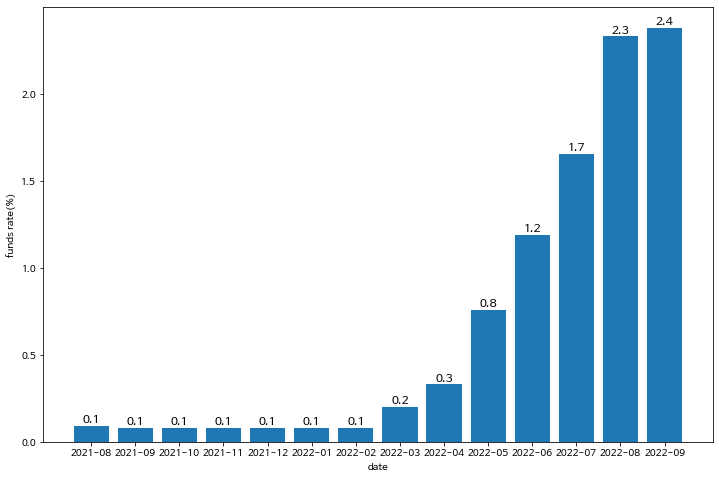

In [109]:
funds_rate = us_economic_monthly_data[us_economic_monthly_data['funds_rate'].isna()==False].funds_rate  # 1954-07~2021-09
funds_rate_2022 = funds_rate['2021-08':'2022']
funds_rate_2022.index = funds_rate_2022.index.astype(str).str[:-3]
plt.figure(figsize=(12, 8))
bar = plt.bar(funds_rate_2022.index, funds_rate_2022.values)
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.xlabel('date')
plt.ylabel('funds rate(%)')
plt.show()

In [110]:
us_data_clean = us_economic_monthly_data_clean.copy()

In [111]:
us_data_clean.index

DatetimeIndex(['1986-01-01', '1986-02-01', '1986-03-01', '1986-04-01',
               '1986-05-01', '1986-06-01', '1986-07-01', '1986-08-01',
               '1986-09-01', '1986-10-01',
               ...
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01'],
              dtype='datetime64[ns]', length=437, freq=None)

In [112]:
us_data_clean.drop('GDP', axis=1, inplace=True)  # GDP 컬럼 드랍

소비자물가상승률(월별) 컬럼 만들기

In [113]:
us_data_clean

,funds_rate,oil_price,CPI,GS3,unemployment_rate,economic_growth_rate
1986-01-01,8.144839,22.925455,3.886256,8.41,6.7,0.476259
1986-02-01,7.860000,15.433625,3.113208,8.10,7.2,0.474001
1986-03-01,7.479032,12.539286,2.255639,7.30,7.2,0.276892
1986-04-01,6.988000,12.843636,1.590271,6.86,7.1,0.276127
1986-05-01,6.852903,15.386023,1.491146,7.27,7.2,0.275367
...,...,...,...,...,...,...
2022-01-01,0.080000,83.307619,7.479872,1.25,4.0,0.530331
2022-02-01,0.080000,91.653875,7.871064,1.65,3.8,0.527533
2022-03-01,0.199565,108.502609,8.542456,2.09,3.6,0.678161
2022-04-01,0.330000,102.035238,8.258629,2.72,3.6,0.673593


In [114]:
date_index = us_data_clean.index
col = 'CPI'
us_data_clean_temp = us_data_clean.copy()
for i in range(len(date_index)):
  if i!= 0:
    present_date_i = us_data_clean_temp.index[i]
    past_date_i = us_data_clean_temp.index[i-1]
    present = us_data_clean_temp.loc[present_date_i, col]
    past = us_data_clean_temp.loc[past_date_i, col]
    temp = (present - past) / past * 100
    us_data_clean.loc[present_date_i, col] = temp
us_data_clean.drop(us_data_clean.index[0], inplace=True)
us_data_clean

,funds_rate,oil_price,CPI,GS3,unemployment_rate,economic_growth_rate
1986-02-01,7.860000,15.433625,-19.891855,8.10,7.2,0.474001
1986-03-01,7.479032,12.539286,-27.546138,7.30,7.2,0.276892
1986-04-01,6.988000,12.843636,-29.497973,6.86,7.1,0.276127
1986-05-01,6.852903,15.386023,-6.233211,7.27,7.2,0.275367
1986-06-01,6.916667,13.425714,18.418913,7.41,7.2,0.457091
...,...,...,...,...,...,...
2022-01-01,0.080000,83.307619,6.302504,1.25,4.0,0.530331
2022-02-01,0.080000,91.653875,5.229921,1.65,3.8,0.527533
2022-03-01,0.199565,108.502609,8.529872,2.09,3.6,0.678161
2022-04-01,0.330000,102.035238,-3.322537,2.72,3.6,0.673593


In [115]:
us_data_clean.columns = ['미국_연준_기준금리', '국제유가_WTI', '미국_소비자물가상승률_월별', '미국_국채금리_3년물', '미국_실업률', '미국_월별_경제성장률']

상관관계 보기(heatmap)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


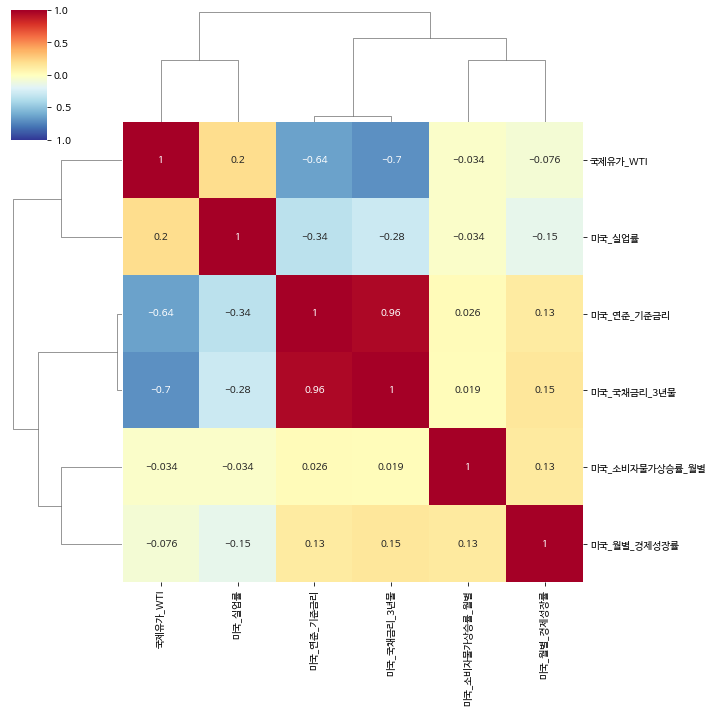

In [116]:
plt.rc('font', family='NanumBarunGothic') 
us_corr = us_data_clean.corr()
sns.clustermap(us_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()

한국 데이터

In [88]:
kor_data = kor_economic_monthly_data.copy()

In [99]:
# 여기에 소비자물가상승률, 미국 기준금리, 기준금리차이_미국-한국. 컬럼 추가

컬럼 추가

In [90]:
# 미국 기준금리
kor_data['미국_기준금리(연%)'] = us_economic_monthly_data['funds_rate']

In [91]:
# 기준금리차이 미국 - 한국
kor_data['기준금리차이_미국-한국(연%)'] = kor_data['미국_기준금리(연%)']-kor_data['기준금리(연%)']

In [92]:
# 컬럼제거 - 대출현황
kor_data.drop(kor_data.columns[14:19], axis=1, inplace=True)

In [94]:
# 컬럼 추가 - 소비자물가상승률(월별)
date_index = kor_data.index
col = '소비자물가지수_총(2020=100)'
kor_data_temp = kor_data.copy()
for i in range(len(date_index)):
  if i!= 0:
    present_date_i = kor_data_temp.index[i]
    past_date_i = kor_data_temp.index[i-1]
    present = kor_data_temp.loc[present_date_i, col]
    past = kor_data_temp.loc[past_date_i, col]
    temp = (present - past) / past * 100
    kor_data.loc[present_date_i, col] = temp
kor_data

,기준금리(연%),가계대출금리(연%),소비자물가지수_총(2020=100),원화환율(원/달러),주택매매가격지수(2022.01=100),콜금리(연%),국고채3년금리(연%),경제성장률,실업률(%),외환보유액_총(천달러),외환보유액_금(천달러),외환보유액_특별인출권(천달러),외환보유액_IMF포지션(천달러),외환보유액_예치금및유가증권(천달러),미국_기준금리(연%),기준금리차이_미국-한국(연%)
1960-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.846774,NaN
1960-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.633333,NaN,NaN,NaN,NaN,NaN,NaN,3.316667,NaN
1960-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.766667,NaN,NaN,NaN,NaN,NaN,NaN,3.225806,NaN
1960-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.100000,NaN,NaN,NaN,NaN,NaN,NaN,2.975806,NaN
1960-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.533333,NaN,NaN,NaN,NaN,NaN,NaN,2.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1.50,4.05,0.744861,1232.34,100.517,1.297,2.941,0.666667,2.7,449297713.0,4794759.0,14977119.0,4449074.0,425076761.0,0.330000,-1.170000
2022-05-01,1.75,4.14,0.664483,1269.88,100.768,1.504,3.019,0.700000,2.8,447711119.0,4794759.0,15081254.0,4479955.0,423355152.0,0.758571,-0.991429
2022-06-01,1.75,4.23,0.613611,1277.35,100.869,1.751,3.477,NaN,2.9,438278346.0,4794759.0,14567162.0,4424498.0,414491928.0,1.187143,-0.562857
2022-07-01,2.25,4.52,0.480503,1307.40,100.869,1.953,3.238,NaN,2.9,438605367.0,4794759.0,14394936.0,4368750.0,415046922.0,1.654500,-0.595500


In [98]:
kor_data.rename(columns={'소비자물가지수_총(2020=100':'소비자물가상승률(%)'}, inplace=True);
kor_data_clean = kor_data[kor_data.isna().sum(axis=1)==0]
kor_data_clean

,기준금리(연%),가계대출금리(연%),소비자물가지수_총(2020=100),원화환율(원/달러),주택매매가격지수(2022.01=100),콜금리(연%),국고채3년금리(연%),경제성장률,실업률(%),외환보유액_총(천달러),외환보유액_금(천달러),외환보유액_특별인출권(천달러),외환보유액_IMF포지션(천달러),외환보유액_예치금및유가증권(천달러),미국_기준금리(연%),기준금리차이_미국-한국(연%)
1999-05-01,4.75,11.00,-0.168241,1197.00,38.374,4.800,6.750,4.400000,6.8,61409325.0,66683.0,10831.0,280487.0,61051324.0,4.742258,-0.007742
1999-06-01,4.75,10.46,-0.588216,1169.63,38.374,4.810,6.880,3.866667,7.3,61987062.0,66683.0,11556.0,278952.0,61629871.0,4.764667,0.014667
1999-07-01,4.75,10.31,-0.340674,1186.04,38.498,4.840,7.890,3.333333,7.0,64944463.0,66683.0,11787.0,284546.0,64581447.0,4.994194,0.244194
1999-08-01,4.75,10.22,1.022244,1199.79,38.747,4.750,8.910,2.800000,6.4,64782273.0,66683.0,14706.0,283925.0,64416959.0,5.072258,0.322258
1999-09-01,4.75,10.21,0.252570,1196.97,39.037,4.740,9.330,2.833333,5.7,65480127.0,66683.0,14909.0,287843.0,65110692.0,5.224333,0.474333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,1.25,3.91,0.624760,1194.01,100.000,1.181,2.060,0.833333,3.6,461526656.0,4794759.0,15288832.0,4606897.0,436836167.0,0.080000,-1.170000
2022-02-01,1.25,3.93,0.582673,1198.34,100.207,1.211,2.285,0.600000,2.7,461766293.0,4794759.0,15313847.0,4614178.0,437043509.0,0.080000,-1.170000
2022-03-01,1.25,3.98,0.721747,1221.03,100.306,1.250,2.369,0.633333,2.7,457810337.0,4794759.0,15415450.0,4578104.0,433022025.0,0.199565,-1.050435
2022-04-01,1.50,4.05,0.744861,1232.34,100.517,1.297,2.941,0.666667,2.7,449297713.0,4794759.0,14977119.0,4449074.0,425076761.0,0.330000,-1.170000


상관관계

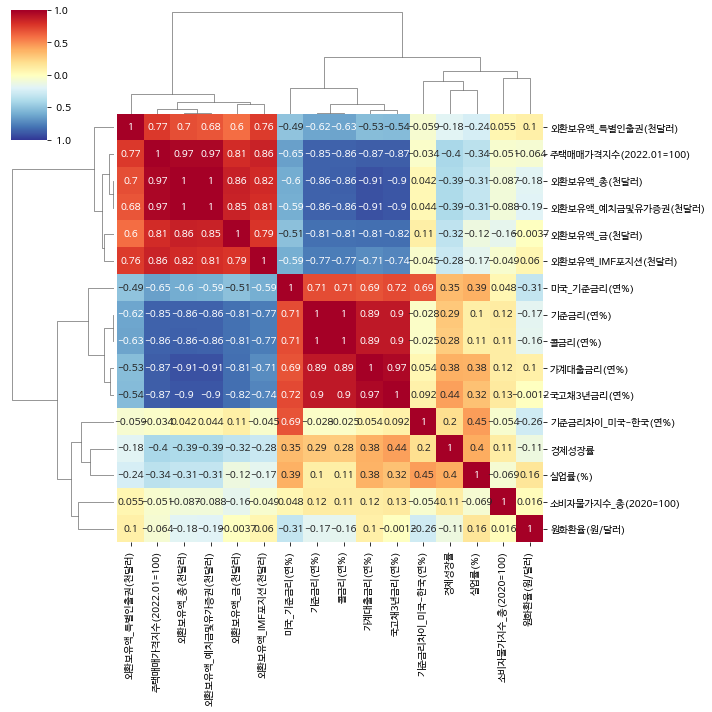

In [102]:
plt.rc('font', family='NanumBarunGothic')
kor_corr = kor_data_clean.corr()
sns.clustermap(kor_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
plt.show()